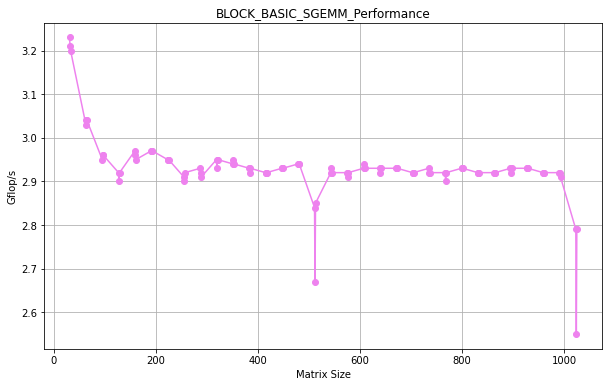

In [14]:
import re
import matplotlib.pyplot as plt

# 读取文件内容
with open('result.txt', 'r') as file:
    content = file.read()

# 使用正则表达式提取Size和Gflop/s的数据
sizes = re.findall(r'Size: (\d+)', content)
gflops = re.findall(r'Gflop/s: (\d+\.*\d*)', content)

# 将提取的数据转换为浮点数
sizes = list(map(int, sizes))
gflops = list(map(float, gflops))

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(sizes, gflops, marker='o', linestyle='-',color = '#ee82ee')

name = 'BLOCK_BASIC_SGEMM_Performance'
plt.title(name)  # 修改标题
plt.xlabel('Matrix Size')
plt.ylabel('Gflop/s')
plt.grid(True)

# 保存高清PNG图像
plt.savefig(name + '.png', dpi=300)  # 指定dpi为300，可以根据需要调整
plt.show()

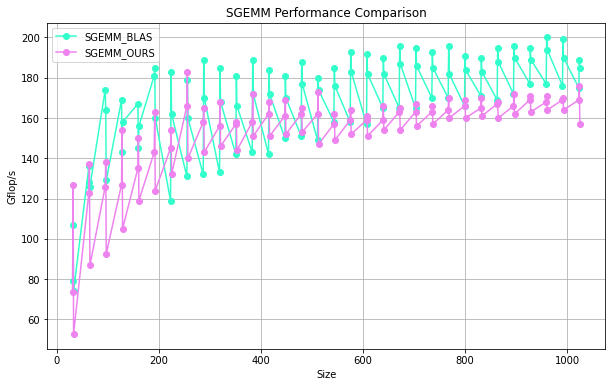

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


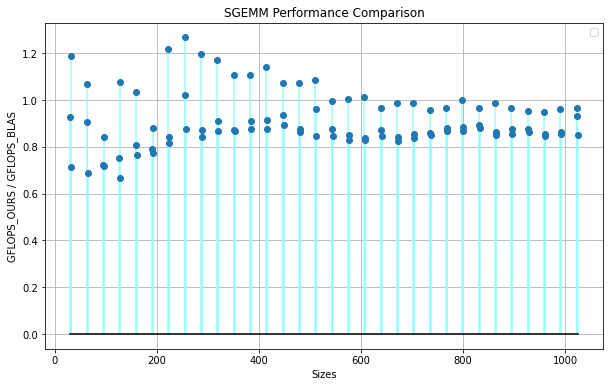

In [18]:
import re
import matplotlib.pyplot as plt

# 读取文件内容
def read_file(file):
    with open(file, 'r') as f:
        content = f.read()
    return content

content0 = read_file('result0.txt')
content1 = read_file('result1.txt')

# 使用正则表达式提取Size和Gflop/s的数据
def extract_data(content):
    sizes = re.findall(r'Size: (\d+)', content)
    gflops = re.findall(r'Gflop/s: (\d+\.*\d*)', content)
    sizes = list(map(int, sizes))
    gflops = list(map(float, gflops))
    return sizes, gflops

sizes0, gflops0 = extract_data(content0)
sizes1, gflops1 = extract_data(content1)

# 绘制折线图
plt.figure(figsize=(10, 6))

plt.plot(sizes0, gflops0, marker='o', linestyle='-', color='#33FFCC', label='SGEMM_BLAS')
plt.plot(sizes1, gflops1, marker='o', linestyle='-', color='violet',label='SGEMM_OURS')

plt.title('SGEMM Performance Comparison')
plt.xlabel('Size')
plt.ylabel('Gflop/s')
plt.grid(True)
plt.legend()

# 保存高清PNG图像
plt.savefig('SGEMM_COMP', dpi=300)
plt.show()


# 绘制折线图
plt.figure(figsize=(10, 6))


gflops_ratio = [gflops1_val / gflops0_val for gflops1_val,
                gflops0_val in zip(gflops1, gflops0)]

# 绘制 stem 图并设置线条颜色为天蓝色
plt.stem(sizes0, gflops_ratio, linefmt='#99FFFF', markerfmt='o',
         basefmt='k', use_line_collection=True)
plt.xlabel('Sizes')
plt.ylabel('GFLOPS_OURS / GFLOPS_BLAS')

plt.title('SGEMM Performance Comparison')
plt.grid(True)
plt.legend()

# 保存高清PNG图像
plt.savefig('SGEMM_COMP_RATIO', dpi=300)
plt.show()